In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
    df_companies = pd.read_csv('moved_project_sql_result_01.csv')
    
    df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
    
    df_hypothesis = pd.read_csv('moved_project_sql_result_07.csv')
    
    print("✅ Archivos cargados exitosamente")
    

✅ Archivos cargados exitosamente


In [3]:
df_companies.info()
df_companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
df_neighborhoods.info()
df_neighborhoods.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df_hypothesis.info()
df_hypothesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


🏆 TOP 10 BARRIOS POR NÚMERO DE FINALIZACIONES
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


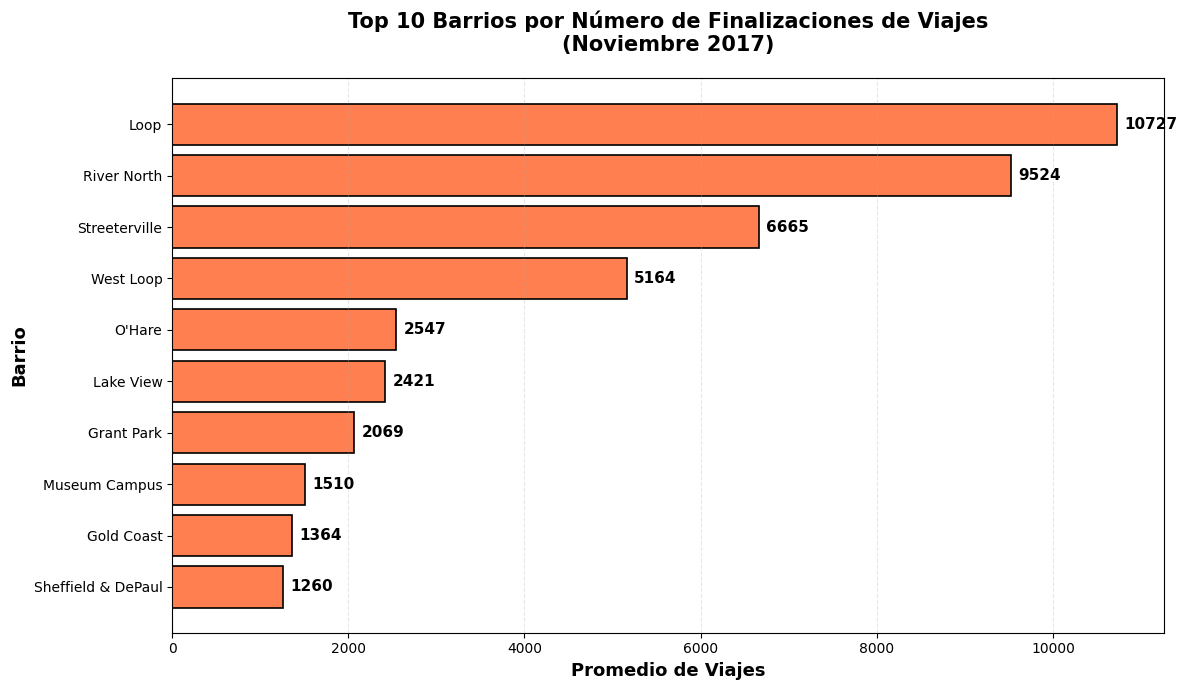

In [9]:
# Ordenar barrios por promedio de viajes y obtener el top 10
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips')

print("🏆 TOP 10 BARRIOS POR NÚMERO DE FINALIZACIONES")
print(top_10_neighborhoods)


top_10_neighborhoods = top_10_neighborhoods.sort_values('average_trips', ascending=True)

# Top 10 barrios por número de finalizaciones
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips').sort_values('average_trips', ascending=True)

# Top 10 barrios por número de finalizaciones
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips').sort_values('average_trips', ascending=True)

# Crear el gráfico
plt.figure(figsize=(12, 7))
bars = plt.barh(top_10_neighborhoods['dropoff_location_name'], 
                top_10_neighborhoods['average_trips'],
                color='coral',
                edgecolor='black',
                linewidth=1.2)

plt.xlabel('Promedio de Viajes', fontsize=13, fontweight='bold')
plt.ylabel('Barrio', fontsize=13, fontweight='bold')
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes\n(Noviembre 2017)', 
          fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores en las barras
plt.bar_label(bars, fmt='%.0f', padding=5, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

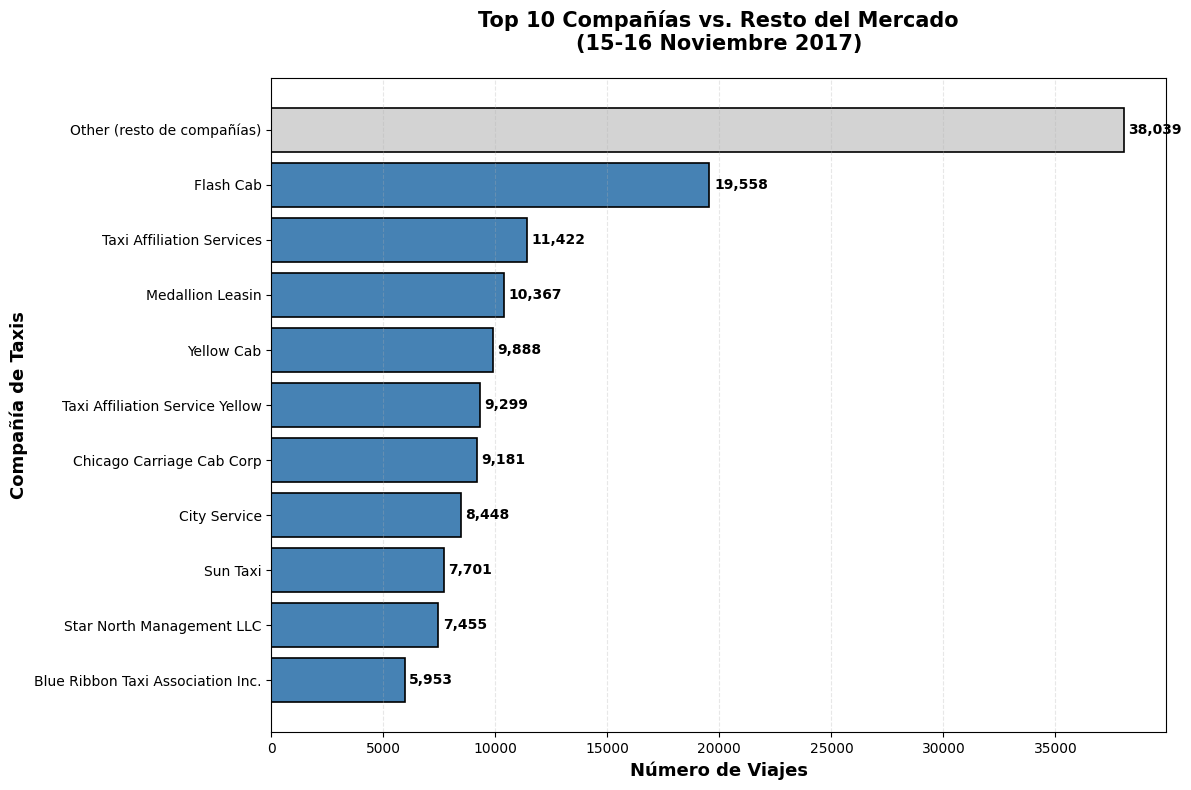


📝 CONCLUSIÓN - Gráfico con 'Other':

- Top 10 compañías: 99,272 viajes
- Resto de compañías: 38,039 viajes
- Las top 10 representan el 72.3% del mercado
- Mercado altamente concentrado en pocas empresas grandes



In [7]:
# ===== TOP 10 COMPAÑÍAS + "OTHER" (el resto) =====

# Separar top 10 y el resto
top_10_companies = df_companies.nlargest(10, 'trips_amount')
rest_companies = df_companies.nsmallest(len(df_companies) - 10, 'trips_amount')

# Crear una fila para "Other" (suma del resto)
other_row = pd.DataFrame({
    'company_name': ['Other (resto de compañías)'],
    'trips_amount': [rest_companies['trips_amount'].sum()]
})

# Combinar
df_plot = pd.concat([top_10_companies, other_row], ignore_index=True)
df_plot = df_plot.sort_values('trips_amount', ascending=True)

# Crear gráfico
plt.figure(figsize=(12, 8))

# Colores: azul para top 10, gris para "Other"
colors = ['steelblue'] * 10 + ['lightgray']

plt.barh(df_plot['company_name'], 
         df_plot['trips_amount'],
         color=colors,
         edgecolor='black',
         linewidth=1.2)

plt.xlabel('Número de Viajes', fontsize=13, fontweight='bold')
plt.ylabel('Compañía de Taxis', fontsize=13, fontweight='bold')
plt.title('Top 10 Compañías vs. Resto del Mercado\n(15-16 Noviembre 2017)', 
          fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Añadir valores
for i, (company, trips) in enumerate(zip(df_plot['company_name'], 
                                           df_plot['trips_amount'])):
    plt.text(trips + 200, i, f'{int(trips):,}', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 📝 CONCLUSIÓN
print("\n📝 CONCLUSIÓN - Gráfico con 'Other':")
print(f"""
- Top 10 compañías: {top_10_companies['trips_amount'].sum():,} viajes
- Resto de compañías: {rest_companies['trips_amount'].sum():,} viajes
- Las top 10 representan el {(top_10_companies['trips_amount'].sum() / df_companies['trips_amount'].sum() * 100):.1f}% del mercado
- Mercado altamente concentrado en pocas empresas grandes
""")

C:\Users\Camilo Mantilla\AppData\Local\Temp\ipykernel_18948\2644065088.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_bad, group_good], labels=['Clima Malo', 'Clima Bueno'], patch_artist=True)


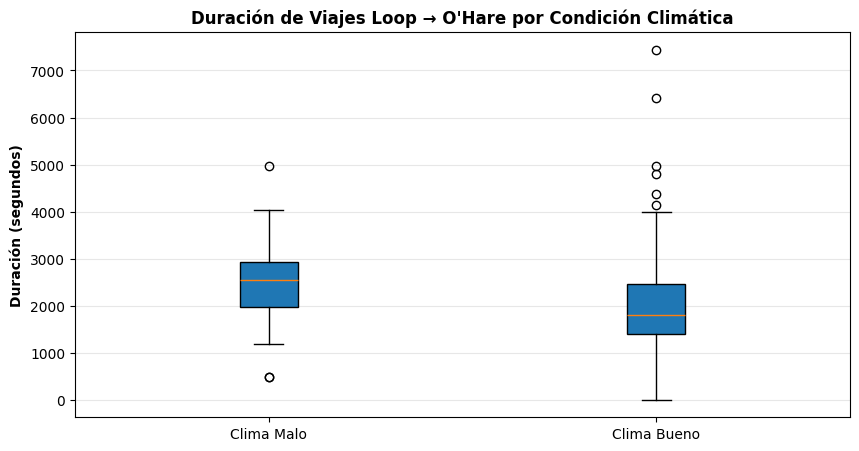

Media Clima Malo: 2427.21 seg | Media Clima Bueno: 1999.68 seg
Valor p: 0.000000 | Alpha: 0.05

✅ Rechazamos H₀: El clima SÍ afecta la duración


In [8]:
# Prueba de Hipótesis: Impacto del Clima en Duración de Viajes

# Separar grupos
group_bad = df_hypothesis[df_hypothesis['weather_conditions'] == 'Bad']['duration_seconds']
group_good = df_hypothesis[df_hypothesis['weather_conditions'] == 'Good']['duration_seconds']

# Visualización
plt.figure(figsize=(10, 5))
plt.boxplot([group_bad, group_good], labels=['Clima Malo', 'Clima Bueno'], patch_artist=True)
plt.ylabel('Duración (segundos)', fontweight='bold')
plt.title('Duración de Viajes Loop → O\'Hare por Condición Climática', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Prueba T
alpha = 0.05
t_statistic, p_value = stats.ttest_ind(group_bad, group_good)

# Resultados
print(f"Media Clima Malo: {group_bad.mean():.2f} seg | Media Clima Bueno: {group_good.mean():.2f} seg")
print(f"Valor p: {p_value:.6f} | Alpha: {alpha}")
print(f"\n{'✅ Rechazamos H₀: El clima SÍ afecta la duración' if p_value < alpha else '❌ No rechazamos H₀: El clima NO afecta la duración'}")

## ✅ Conclusiones

### Resultados de la Prueba
- **Valor p:** 0.000000 (altamente significativo)
- **Decisión:** Rechazamos H₀ con un 99.9999% de confianza

### Hallazgos Clave
1. **Impacto significativo del clima:** Los viajes en sábados lluviosos duran **7.1 minutos más** en promedio (427 segundos adicionales)
2. **Aumento del 21%:** El clima malo incrementa la duración en más de una quinta parte
3. **Mayor variabilidad:** Los viajes con mal clima muestran más dispersión, indicando mayor impredecibilidad

### Recomendaciones para Zuber
- **Ajustar tiempos estimados:** Añadir 7-10 minutos extra en días lluviosos
- **Pricing dinámico:** Considerar tarifas ajustadas por clima en esta ruta
- **Asignación de conductores:** Aumentar disponibilidad los sábados con pronóstico de lluvia
- **Comunicación:** Informar a usuarios sobre demoras esperadas por condiciones climáticas